# Sign Language Dataset Exploration

This notebook explores the contents of the `data` folder in the sign language project.

## Overview
The data folder contains various files related to sign language datasets, including video files, JSON configuration files, and text files.

In [1]:
# Import necessary libraries
import json
import os
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better visualizations
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

## 1. Data Folder Structure

The data folder contains:
- **JSON Files**: Different dataset configurations (nslt_100, nslt_300, nslt_1000, nslt_2000, WLASL_v0.3)
- **Text Files**: missing.txt (list of missing videos), wlasl_class_list.txt (class labels)
- **Videos Folder**: Contains MP4 video files of sign language gestures

In [2]:
# Define data directory
DATA_DIR = Path(r'../data')

# List all files in the data folder
print("Files in data folder:")
print("=" * 50)
for item in sorted(DATA_DIR.iterdir()):
    if item.is_file():
        size = item.stat().st_size / (1024 * 1024)  # Size in MB
        print(f"📄 {item.name:<30} ({size:.2f} MB)")
    else:
        print(f"📁 {item.name}/")

Files in data folder:
📄 missing.txt                    (0.05 MB)
📄 nslt_100.json                  (0.10 MB)
📄 nslt_1000.json                 (0.67 MB)
📄 nslt_2000.json                 (1.08 MB)
📄 nslt_300.json                  (0.26 MB)
📁 videos/
📄 wlasl_class_list.txt           (0.02 MB)
📄 WLASL_v0.3.json                (11.38 MB)


## 2. Video Files Analysis

The `videos` folder contains MP4 files of sign language gestures.

In [3]:
# Count video files
videos_dir = DATA_DIR / 'videos'
video_files = list(videos_dir.glob('*.mp4'))

print(f"Total number of video files: {len(video_files)}")
print(f"\nSample video files (first 10):")
for video in video_files[:10]:
    print(f"  - {video.name}")

Total number of video files: 11980

Sample video files (first 10):
  - 00335.mp4
  - 00336.mp4
  - 00338.mp4
  - 00339.mp4
  - 00341.mp4
  - 00376.mp4
  - 00377.mp4
  - 00381.mp4
  - 00382.mp4
  - 00384.mp4


## 3. WLASL Class List

The `wlasl_class_list.txt` file contains the mapping of class indices to sign language words/phrases.

In [4]:
# Read and display class list
class_list_file = DATA_DIR / 'wlasl_class_list.txt'
with open(class_list_file, 'r') as f:
    class_lines = f.readlines()

print(f"Total number of classes: {len(class_lines)}")
print(f"\nFirst 20 classes:")
print("=" * 50)
for line in class_lines[:20]:
    idx, word = line.strip().split('\t')
    print(f"{idx:>4}: {word}")

Total number of classes: 2000

First 20 classes:
   0: book
   1: drink
   2: computer
   3: before
   4: chair
   5: go
   6: clothes
   7: who
   8: candy
   9: cousin
  10: deaf
  11: fine
  12: help
  13: no
  14: thin
  15: walk
  16: year
  17: yes
  18: all
  19: black


## 4. Missing Videos

The `missing.txt` file contains IDs of videos that are not available in the dataset.

In [5]:
# Read missing videos list
missing_file = DATA_DIR / 'missing.txt'
with open(missing_file, 'r') as f:
    missing_videos = f.readlines()

print(f"Total number of missing videos: {len(missing_videos)}")
print(f"\nFirst 20 missing video IDs:")
for video_id in missing_videos[:20]:
    print(f"  - {video_id.strip()}")

Total number of missing videos: 9103

First 20 missing video IDs:
  - 65225
  - 68011
  - 68208
  - 68012
  - 70212
  - 70266
  - 07085
  - 07086
  - 07087
  - 07088
  - 07089
  - 07090
  - 07091
  - 07092
  - 07093
  - 07094
  - 07095
  - 07096
  - 07097
  - 07098


## 5. NSLT Dataset Configurations

NSLT (National Sign Language Translation) dataset configurations with different numbers of classes.

In [6]:
# Analyze NSLT configuration files
nslt_files = ['nslt_100.json', 'nslt_300.json', 'nslt_1000.json', 'nslt_2000.json']

nslt_stats = []
for nslt_file in nslt_files:
    file_path = DATA_DIR / nslt_file
    with open(file_path, 'r') as f:
        data = json.load(f)
    
    num_videos = len(data)
    num_classes = nslt_file.split('_')[1].split('.')[0]
    
    # Count splits
    train_count = sum(1 for v in data.values() if v['subset'] == 'train')
    val_count = sum(1 for v in data.values() if v['subset'] == 'val')
    test_count = sum(1 for v in data.values() if v['subset'] == 'test')
    
    nslt_stats.append({
        'Configuration': f'NSLT-{num_classes}',
        'Total Videos': num_videos,
        'Train': train_count,
        'Validation': val_count,
        'Test': test_count
    })

# Create DataFrame for better visualization
df_nslt = pd.DataFrame(nslt_stats)
print("\nNSLT Dataset Configurations:")
print("=" * 70)
print(df_nslt.to_string(index=False))


NSLT Dataset Configurations:
Configuration  Total Videos  Train  Validation  Test
     NSLT-100          2038   1442         338   258
     NSLT-300          5118   3549         901   668
    NSLT-1000         13174   8978        2320  1876
    NSLT-2000         21095  14296        3920  2879


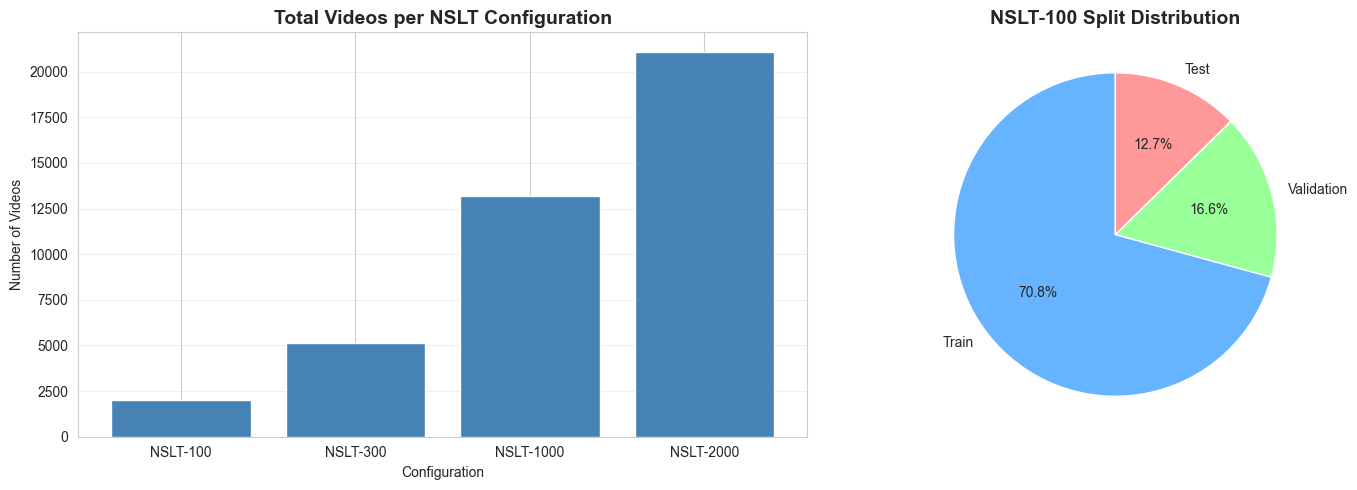

In [7]:
# Visualize NSLT dataset splits
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot 1: Total videos per configuration
axes[0].bar(df_nslt['Configuration'], df_nslt['Total Videos'], color='steelblue')
axes[0].set_title('Total Videos per NSLT Configuration', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Configuration')
axes[0].set_ylabel('Number of Videos')
axes[0].grid(axis='y', alpha=0.3)

# Plot 2: Split distribution for NSLT-100
split_data = df_nslt.iloc[0][['Train', 'Validation', 'Test']]
axes[1].pie(split_data, labels=split_data.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#99ff99', '#ff9999'])
axes[1].set_title(f'{df_nslt.iloc[0]["Configuration"]} Split Distribution', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

## 6. WLASL_v0.3 Dataset Analysis

The main WLASL (Word-Level American Sign Language) dataset containing detailed information about sign language videos.

In [8]:
# Load WLASL dataset
wlasl_file = DATA_DIR / 'WLASL_v0.3.json'
with open(wlasl_file, 'r') as f:
    wlasl_data = json.load(f)

print(f"Total number of glosses (words): {len(wlasl_data)}")
print(f"\nFirst gloss example:")
print(json.dumps(wlasl_data[0], indent=2)[:500] + "...")

Total number of glosses (words): 2000

First gloss example:
{
  "gloss": "book",
  "instances": [
    {
      "bbox": [
        385,
        37,
        885,
        720
      ],
      "fps": 25,
      "frame_end": -1,
      "frame_start": 1,
      "instance_id": 0,
      "signer_id": 118,
      "source": "aslbrick",
      "split": "train",
      "url": "http://aslbricks.org/New/ASL-Videos/book.mp4",
      "variation_id": 0,
      "video_id": "69241"
    },
    {
      "bbox": [
        190,
        25,
        489,
        370
      ],
      "fps": 25,
...


In [9]:
# Analyze WLASL dataset structure
total_instances = sum(len(item['instances']) for item in wlasl_data)
glosses_with_multiple_variations = sum(1 for item in wlasl_data if len(item['instances']) > 1)

print(f"Total video instances: {total_instances}")
print(f"Glosses with multiple variations: {glosses_with_multiple_variations}")
print(f"Average instances per gloss: {total_instances / len(wlasl_data):.2f}")

# Count instances per split
splits = {'train': 0, 'val': 0, 'test': 0}
sources = {}

for item in wlasl_data:
    for instance in item['instances']:
        split = instance.get('split', 'unknown')
        source = instance.get('source', 'unknown')
        splits[split] = splits.get(split, 0) + 1
        sources[source] = sources.get(source, 0) + 1

print("\nSplit distribution:")
for split, count in splits.items():
    print(f"  {split}: {count} ({count/total_instances*100:.1f}%)")

print("\nVideo sources:")
for source, count in sorted(sources.items(), key=lambda x: x[1], reverse=True):
    print(f"  {source}: {count} ({count/total_instances*100:.1f}%)")

Total video instances: 21083
Glosses with multiple variations: 2000
Average instances per gloss: 10.54

Split distribution:
  train: 14289 (67.8%)
  val: 3916 (18.6%)
  test: 2878 (13.7%)

Video sources:
  signingsavvy: 2668 (12.7%)
  handspeak: 2211 (10.5%)
  signschool: 1968 (9.3%)
  aslsearch: 1875 (8.9%)
  asldeafined: 1833 (8.7%)
  aslu: 1827 (8.7%)
  aslpro: 1736 (8.2%)
  spreadthesign: 1584 (7.5%)
  asl5200: 1561 (7.4%)
  aslsignbank: 1071 (5.1%)
  asllex: 814 (3.9%)
  startasl: 623 (3.0%)
  northtexas: 295 (1.4%)
  lillybauer: 269 (1.3%)
  aslbrick: 218 (1.0%)
  nabboud: 200 (0.9%)
  elementalasl: 161 (0.8%)
  valencia-asl: 133 (0.6%)
  scott: 36 (0.2%)


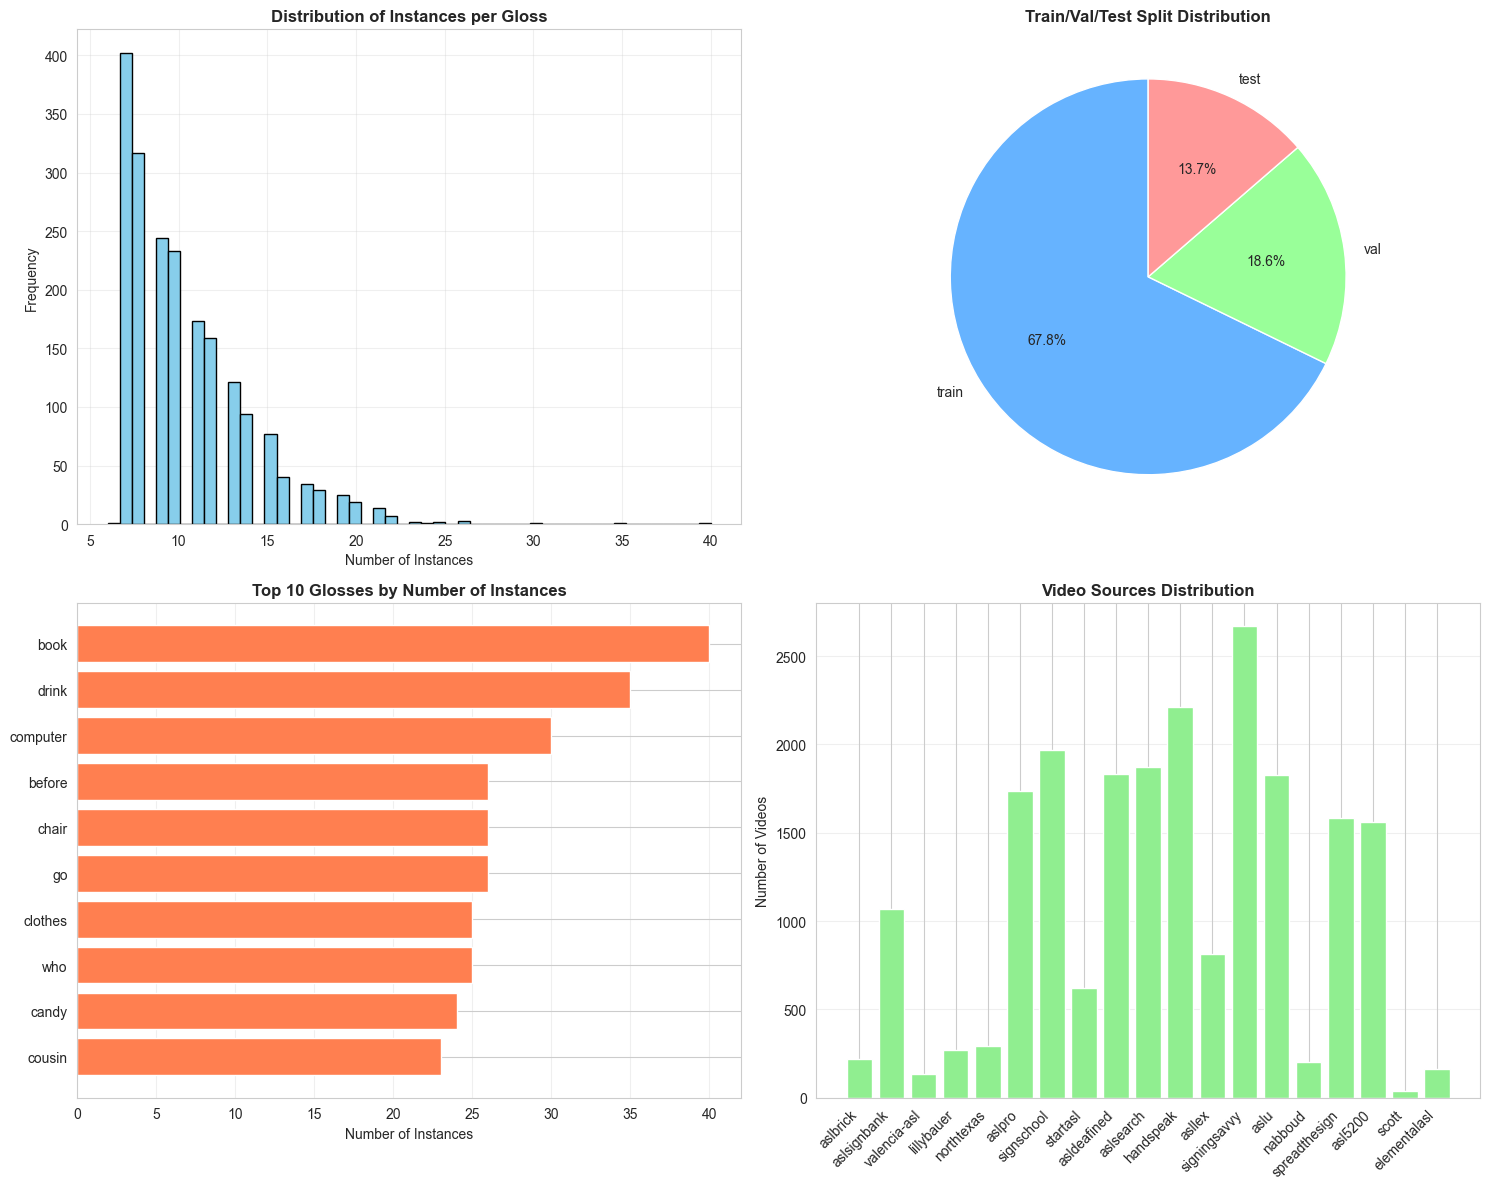

In [10]:
# Visualize WLASL dataset statistics
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: Instances per gloss distribution
instances_per_gloss = [len(item['instances']) for item in wlasl_data]
axes[0, 0].hist(instances_per_gloss, bins=50, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Distribution of Instances per Gloss', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Number of Instances')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].grid(alpha=0.3)

# Plot 2: Split distribution
split_labels = list(splits.keys())
split_values = list(splits.values())
axes[0, 1].pie(split_values, labels=split_labels, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#99ff99', '#ff9999'])
axes[0, 1].set_title('Train/Val/Test Split Distribution', fontsize=12, fontweight='bold')

# Plot 3: Top 10 glosses by number of instances
top_glosses = sorted(wlasl_data, key=lambda x: len(x['instances']), reverse=True)[:10]
gloss_names = [item['gloss'] for item in top_glosses]
gloss_counts = [len(item['instances']) for item in top_glosses]
axes[1, 0].barh(gloss_names, gloss_counts, color='coral')
axes[1, 0].set_title('Top 10 Glosses by Number of Instances', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Number of Instances')
axes[1, 0].invert_yaxis()
axes[1, 0].grid(axis='x', alpha=0.3)

# Plot 4: Video sources distribution
source_names = list(sources.keys())
source_counts = list(sources.values())
axes[1, 1].bar(range(len(source_names)), source_counts, color='lightgreen')
axes[1, 1].set_xticks(range(len(source_names)))
axes[1, 1].set_xticklabels(source_names, rotation=45, ha='right')
axes[1, 1].set_title('Video Sources Distribution', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('Number of Videos')
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## 7. Sample NSLT-100 Data

Let's examine the structure of NSLT-100 configuration file in detail.

In [11]:
# Load NSLT-100
with open(DATA_DIR / 'nslt_100.json', 'r') as f:
    nslt_100 = json.load(f)

# Display sample entries
print("Sample entries from NSLT-100:")
print("=" * 70)
sample_count = 0
for video_id, info in list(nslt_100.items())[:5]:
    sample_count += 1
    print(f"\nVideo ID: {video_id}")
    print(f"  Subset: {info['subset']}")
    print(f"  Actions: {info['action']}")
    print(f"  Number of actions: {len(info['action'])}")

Sample entries from NSLT-100:

Video ID: 05237
  Subset: train
  Actions: [77, 1, 55]
  Number of actions: 3

Video ID: 69422
  Subset: val
  Actions: [27, 1, 51]
  Number of actions: 3

Video ID: 10899
  Subset: train
  Actions: [82, 1, 48]
  Number of actions: 3

Video ID: 10898
  Subset: val
  Actions: [82, 1, 39]
  Number of actions: 3

Video ID: 10893
  Subset: train
  Actions: [82, 1, 50]
  Number of actions: 3


## 8. Summary Statistics

In [12]:
# Create comprehensive summary
summary = {
    'Dataset Files': {
        'WLASL v0.3': f'{len(wlasl_data)} glosses, {total_instances} video instances',
        'NSLT-100': f'{nslt_stats[0]["Total Videos"]} videos',
        'NSLT-300': f'{nslt_stats[1]["Total Videos"]} videos',
        'NSLT-1000': f'{nslt_stats[2]["Total Videos"]} videos',
        'NSLT-2000': f'{nslt_stats[3]["Total Videos"]} videos',
    },
    'Video Files': {
        'Total videos in folder': len(video_files),
        'Missing videos': len(missing_videos)
    },
    'Classes': {
        'Total sign language words/phrases': len(class_lines)
    }
}

print("\n" + "=" * 70)
print("DATASET SUMMARY")
print("=" * 70)
for category, items in summary.items():
    print(f"\n{category}:")
    for key, value in items.items():
        print(f"  • {key}: {value}")


DATASET SUMMARY

Dataset Files:
  • WLASL v0.3: 2000 glosses, 21083 video instances
  • NSLT-100: 2038 videos
  • NSLT-300: 5118 videos
  • NSLT-1000: 13174 videos
  • NSLT-2000: 21095 videos

Video Files:
  • Total videos in folder: 11980
  • Missing videos: 9103

Classes:
  • Total sign language words/phrases: 2000


## Conclusion

This notebook has explored the sign language dataset stored in the `data` folder. Key findings:

1. **Multiple Dataset Configurations**: NSLT datasets with 100, 300, 1000, and 2000 classes
2. **Comprehensive WLASL Dataset**: Contains detailed video metadata including bounding boxes, frame information, and URLs
3. **Video Collection**: Large collection of MP4 files with numbered identifiers
4. **Class Mappings**: 2000+ sign language words/phrases mapped to indices
5. **Data Organization**: Clear split into training, validation, and test sets

This dataset appears to be well-structured for training sign language recognition models.